In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.express as px
from sklearn.metrics import silhouette_score

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
from math import isnan

In [2]:
raw_df = pd.read_csv('https://media.githubusercontent.com/media/akilaliyanage/ML_Assignment2_IT19120812_IT19188546_IT19120362/main/Pakistan_Largest_Ecommerce_Dataset.csv',
                         dtype={'CustomerID': str,'InvoiceID': str})

raw_df.head(5)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (1,2,3,7,8,9,11,12,13,14,17,18,19) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,sales_commission_code,...,Month,Customer Since,M-Y,FY,Customer ID,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,211131.0,complete,7/1/2016,kreations_YI 06-L,1950.0,1.0,1950.0,100147443,Women's Fashion,\N,...,7.0,2016-7,7-2016,FY17,1.0,NaN,NaN,NaN,NaN,NaN
1,211133.0,canceled,7/1/2016,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...,240.0,1.0,240.0,100147444,Beauty & Grooming,\N,...,7.0,2016-7,7-2016,FY17,2.0,NaN,NaN,NaN,NaN,NaN
2,211134.0,canceled,7/1/2016,Ego_UP0017-999-MR0,2450.0,1.0,2450.0,100147445,Women's Fashion,\N,...,7.0,2016-7,7-2016,FY17,3.0,NaN,NaN,NaN,NaN,NaN
3,211135.0,complete,7/1/2016,kcc_krone deal,360.0,1.0,60.0,100147446,Beauty & Grooming,R-FSD-52352,...,7.0,2016-7,7-2016,FY17,4.0,NaN,NaN,NaN,NaN,NaN
4,211136.0,order_refunded,7/1/2016,BK7010400AG,555.0,2.0,1110.0,100147447,Soghaat,\N,...,7.0,2016-7,7-2016,FY17,5.0,NaN,NaN,NaN,NaN,NaN


In [3]:
raw_df.rename(columns = {'Customer Since':'Customer_Since', 'Customer ID':'Customer_ID' , 'Unnamed: 21' : 'Unnamed:21', 'Unnamed: 22' : 'Unnamed:22', 'Unnamed: 23' : 'Unnamed:23', 'Unnamed: 24' : 'Unnamed:24', 'Unnamed: 25' : 'Unnamed:25'}, inplace = True)

In [4]:
print('Initial Dataset Diamentions:', raw_df.shape)
dist_status =  raw_df.status.unique()
dist_status

Initial Dataset Diamentions: (1048575, 26)


array(['complete', 'canceled', 'order_refunded', 'received', 'refund',
       'closed', 'fraud', 'holded', 'exchange', 'pending_paypal', 'paid',
       '\\N', 'cod', 'pending', nan, 'processing', 'payment_review'],
      dtype=object)

In [5]:
print('Number Of Distinct Order Status :', len(dist_status))

Number Of Distinct Order Status : 17


In [6]:
dist_cate = raw_df.category_name_1.unique()
dist_cate

array(["Women's Fashion", 'Beauty & Grooming', 'Soghaat',
       'Mobiles & Tablets', 'Appliances', 'Home & Living',
       "Men's Fashion", 'Kids & Baby', '\\N', 'Others', 'Entertainment',
       'Computing', 'Superstore', 'Health & Sports', 'Books',
       'School & Education', nan], dtype=object)

In [7]:
print('Number Of Distinct Customers :', len(raw_df.Customer_ID.unique()))

Number Of Distinct Customers : 115327


In [8]:
raw_df_stats=pd.DataFrame(raw_df.dtypes).T.rename(index={0:'Column Data Type'})
raw_df_stats=raw_df_stats.append(pd.DataFrame(raw_df.isnull().sum()).T.rename(index={0:'Null Value Count'}))
raw_df_stats=raw_df_stats.append(pd.DataFrame(raw_df.isnull().sum()/raw_df.shape[0]*100).T.rename(index={0:'Null Value Percentage'}))

display(raw_df_stats)

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,sales_commission_code,...,Month,Customer_Since,M-Y,FY,Customer_ID,Unnamed:21,Unnamed:22,Unnamed:23,Unnamed:24,Unnamed:25
Column Data Type,float64,object,object,object,float64,float64,float64,object,object,object,...,float64,object,object,object,float64,float64,float64,float64,float64,float64
Null Value Count,464051,464066,464051,464071,464051,464051,464051,464051,464215,601226,...,464051,464062,464051,464051,464062,1048575,1048575,1048575,1048575,1048575
Null Value Percentage,44.255394,44.256825,44.255394,44.257302,44.255394,44.255394,44.255394,44.255394,44.271034,57.337434,...,44.255394,44.256443,44.255394,44.255394,44.256443,100.0,100.0,100.0,100.0,100.0


In [9]:
stage1_df = raw_df.drop(raw_df[(raw_df.Customer_ID.isnull()) | (raw_df.status.isnull()) | (raw_df.category_name_1.isnull())].index)
stage1_df = stage1_df.drop(stage1_df[(stage1_df.status == 'canceled') | (stage1_df.status == 'order_refunded') | (stage1_df.status == 'refund') | (stage1_df.status == '\\N') | (stage1_df.status == 'fraud') | (stage1_df.status == 'cod') | (stage1_df.category_name_1 == '\\N')].index)
stage1_df = stage1_df.drop(['Unnamed:21', 'Unnamed:22' , 'Unnamed:23', 'Unnamed:24' , 'Unnamed:25'], axis=1)

In [10]:
stage1_df_stats=pd.DataFrame(stage1_df.dtypes).T.rename(index={0:'Column Data Type'})
stage1_df_stats=stage1_df_stats.append(pd.DataFrame(stage1_df.isnull().sum()).T.rename(index={0:'Null Value Count'}))
stage1_df_stats=stage1_df_stats.append(pd.DataFrame(stage1_df.isnull().sum()/stage1_df.shape[0]*100).T.rename(index={0:'Null Value Percentage'}))

display(stage1_df_stats)

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,sales_commission_code,...,payment_method,Working Date,BI Status,MV,Year,Month,Customer_Since,M-Y,FY,Customer_ID
Column Data Type,float64,object,object,object,float64,float64,float64,object,object,object,...,object,object,object,object,float64,float64,object,object,object,float64
Null Value Count,0,0,0,0,0,0,0,0,0,63195,...,0,0,0,0,0,0,0,0,0,0
Null Value Percentage,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.422574,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
print('Stage 1 Dataframe Diamentions:', stage1_df.shape)

dist_status =  stage1_df.status.unique()
print('Distinct Status : ' , dist_status)
print('Number Of Distinct Order Status :', len(dist_status))

dist_cate = stage1_df.category_name_1.unique()
print('Distinct Categories : ' , dist_cate)
print('Number Of Distinct Categories :', len(dist_cate))

print('Number Of Distinct Customers :', len(stage1_df.Customer_ID.unique()))

Stage 1 Dataframe Diamentions: (309437, 21)
Distinct Status :  ['complete' 'received' 'closed' 'holded' 'exchange' 'pending_paypal'
 'paid' 'pending' 'processing' 'payment_review']
Number Of Distinct Order Status : 10
Distinct Categories :  ["Women's Fashion" 'Beauty & Grooming' 'Soghaat' 'Appliances'
 'Home & Living' 'Kids & Baby' 'Others' 'Mobiles & Tablets'
 "Men's Fashion" 'Computing' 'Superstore' 'Health & Sports' 'Books'
 'School & Education' 'Entertainment']
Number Of Distinct Categories : 15
Number Of Distinct Customers : 78998


In [12]:
stage1_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 309437 entries, 0 to 584523
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   item_id                309437 non-null  float64
 1   status                 309437 non-null  object 
 2   created_at             309437 non-null  object 
 3   sku                    309437 non-null  object 
 4   price                  309437 non-null  float64
 5   qty_ordered            309437 non-null  float64
 6   grand_total            309437 non-null  float64
 7   increment_id           309437 non-null  object 
 8   category_name_1        309437 non-null  object 
 9   sales_commission_code  246242 non-null  object 
 10  discount_amount        309437 non-null  float64
 11  payment_method         309437 non-null  object 
 12  Working Date           309437 non-null  object 
 13  BI Status              309437 non-null  object 
 14   MV                    309437 non-nu

In [13]:
stage1_df.describe()

,item_id,price,qty_ordered,grand_total,discount_amount,Year,Month,Customer_ID
count,309437.000000,309437.000000,309437.000000,3.094370e+05,309437.000000,309437.000000,309437.000000,309437.000000
mean,552793.538371,3940.296029,1.254039,5.189461e+03,484.858219,2017.005833,7.179141,42945.736163
std,197765.966761,9799.186259,2.945002,4.702091e+04,1458.342886,0.699836,3.527740,33612.963701
min,211131.000000,0.000000,1.000000,-1.594000e+03,0.000000,2016.000000,1.000000,1.000000
25%,385096.000000,299.000000,1.000000,7.990000e+02,0.000000,2017.000000,4.000000,11206.000000
50%,549298.000000,699.000000,1.000000,1.486000e+03,0.000000,2017.000000,7.000000,39088.000000
75%,722638.000000,1980.000000,1.000000,4.098000e+03,146.750000,2017.000000,11.000000,70234.000000
max,905208.000000,189691.000000,1000.000000,1.788800e+07,90300.000000,2018.000000,12.000000,115326.000000


In [14]:
per_customer_grand_total_df = stage1_df[['Customer_ID', 'grand_total']].groupby('Customer_ID', as_index = False).sum()
per_customer_grand_total_df.rename(columns = {'grand_total' : 'Monetary'}, inplace = True)
per_customer_grand_total_df

,Customer_ID,Monetary
0,1.0,1950.0
1,3.0,4980.0
2,4.0,1226129.5
3,6.0,170.0
4,7.0,105.0
...,...,...
78993,115316.0,5749.0
78994,115317.0,1149.0
78995,115322.0,1298.0
78996,115323.0,44499.0


In [15]:
per_customer_shopping_frequency_df =  stage1_df[['Customer_ID', 'created_at']].groupby('Customer_ID', as_index = False).count()
per_customer_shopping_frequency_df.rename(columns = {'created_at': 'Frequency'}, inplace = True)
per_customer_shopping_frequency_df

,Customer_ID,Frequency
0,1.0,1
1,3.0,4
2,4.0,254
3,6.0,1
4,7.0,4
...,...,...
78993,115316.0,1
78994,115317.0,1
78995,115322.0,1
78996,115323.0,1


In [16]:
processed_sales_df = per_customer_grand_total_df.merge(per_customer_shopping_frequency_df, on = "Customer_ID", how = "inner")
processed_sales_df

,Customer_ID,Monetary,Frequency
0,1.0,1950.0,1
1,3.0,4980.0,4
2,4.0,1226129.5,254
3,6.0,170.0,1
4,7.0,105.0,4
...,...,...,...
78993,115316.0,5749.0,1
78994,115317.0,1149.0,1
78995,115322.0,1298.0,1
78996,115323.0,44499.0,1


In [17]:
most_reason_order_df = stage1_df[['Customer_ID', 'created_at']].groupby('Customer_ID', as_index = False).max()
most_reason_order_df.rename(columns = {'created_at': 'Most_Reason_Order_Date'}, inplace = True)
most_reason_order_df

,Customer_ID,Most_Reason_Order_Date
0,1.0,7/1/2016
1,3.0,5/19/2017
2,4.0,9/5/2016
3,6.0,7/1/2016
4,7.0,7/1/2016
...,...,...
78993,115316.0,8/28/2018
78994,115317.0,8/28/2018
78995,115322.0,8/28/2018
78996,115323.0,8/28/2018


In [18]:
stage1_df['created_at1'] = pd.to_datetime(stage1_df['created_at'])
most_reason_order_df['Most_Reason_Order_Date1'] = pd.to_datetime(most_reason_order_df['Most_Reason_Order_Date'])

In [19]:
time_diff_between_recent_and_purchase = pd.Series(data = [d.days for d in (stage1_df['created_at1'].max() - most_reason_order_df['Most_Reason_Order_Date1'])+ pd.Timedelta("1 days")], index = processed_sales_df.index)
time_diff_between_recent_and_purchase

0        789
1        467
2        723
3        789
4        789
        ... 
78993      1
78994      1
78995      1
78996      1
78997      1
Length: 78998, dtype: int64

In [20]:
processed_sales_df['Recency'] = time_diff_between_recent_and_purchase
processed_sales_df

,Customer_ID,Monetary,Frequency,Recency
0,1.0,1950.0,1,789
1,3.0,4980.0,4,467
2,4.0,1226129.5,254,723
3,6.0,170.0,1,789
4,7.0,105.0,4,789
...,...,...,...,...
78993,115316.0,5749.0,1,1
78994,115317.0,1149.0,1,1
78995,115322.0,1298.0,1,1
78996,115323.0,44499.0,1,1


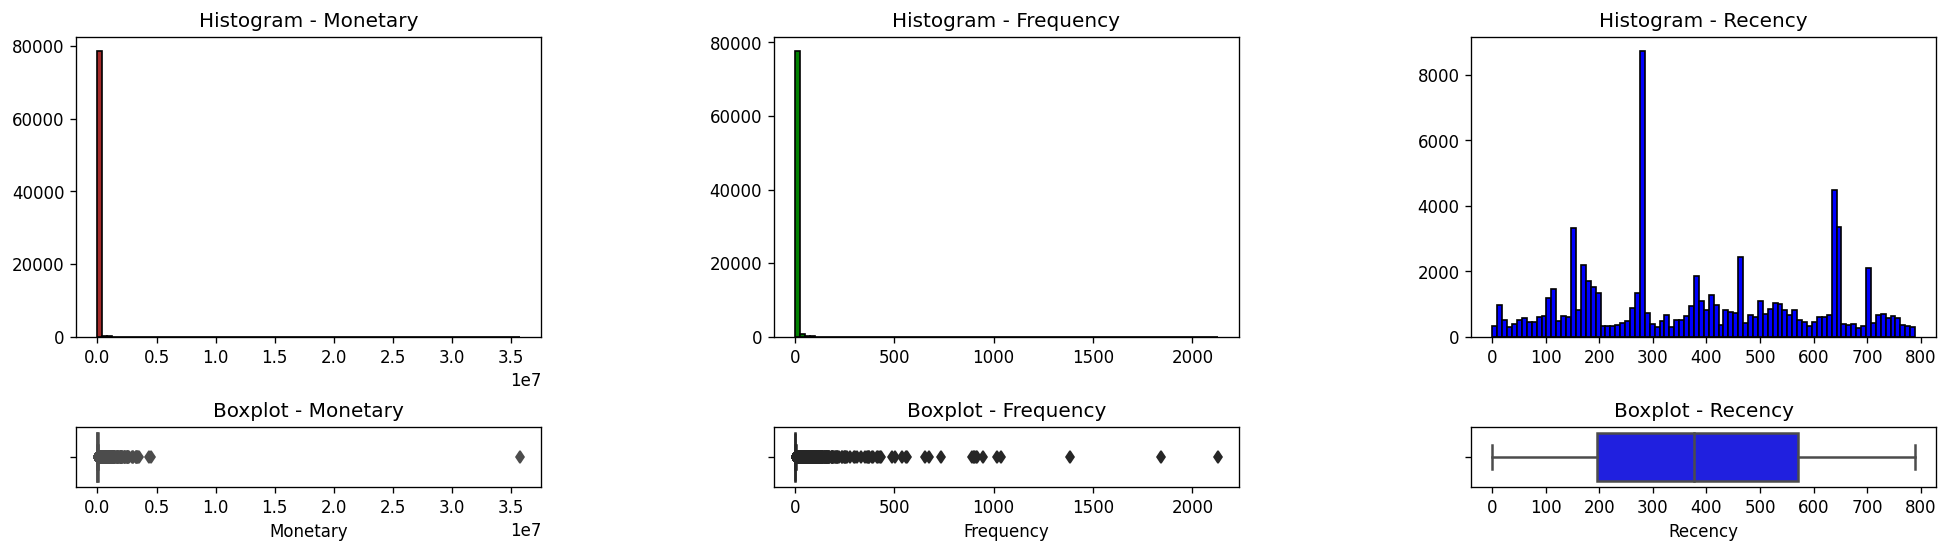

In [21]:
#Configure the sub plot setup
fig, axis = plt.subplots(nrows = 2, ncols = 3, figsize = (20, 5), dpi = 120,sharex = False, sharey = False, gridspec_kw = {'height_ratios': [5, 1]})
# Ajusts the spaces between sub Plots
plt.subplots_adjust(bottom=0.05, top=0.8 , wspace=0.5, hspace=0.5)

# Monetary based vizualization
axis[0, 0].hist(processed_sales_df['Monetary'],facecolor = 'brown', edgecolor = 'black', bins = 'rice')
sns.boxplot(data = processed_sales_df,  color = 'red', x = 'Monetary',  ax = axis[1, 0])
axis[0, 0].set_title("Histogram - Monetary")
axis[1, 0].set_title("Boxplot - Monetary")

# Frequency based vizualization
axis[0, 1].hist(processed_sales_df['Frequency'], facecolor = 'green', edgecolor = 'black', bins = 'rice')
sns.boxplot(data = processed_sales_df,  color = 'green', x = 'Frequency', ax = axis[1, 1])
axis[0, 1].set_title("Histogram - Frequency")
axis[1, 1].set_title("Boxplot - Frequency")

# Recency based vizualization
axis[0, 2].hist(processed_sales_df['Recency'],  facecolor = 'blue', edgecolor = 'black', bins = 'rice')
sns.boxplot(data = processed_sales_df,  color = 'blue', x = 'Recency',  ax = axis[1, 2])
axis[0, 2].set_title("Histogram - Recency")
axis[1, 2].set_title("Boxplot - Recency")

plt.show()

In [22]:
processed_sales_df.info()

def get_outliers_by_z_score(dataframe, column):
  thold = 2
  outlier_arr= []
  column_mean = np.mean(dataframe[column])
  st_deviation = np.std(dataframe[column])

  for val in dataframe[column]:
    z_score = (val - column_mean)/st_deviation
    if np.abs(z_score) > thold:
      outlier_arr.append(val)
  return outlier_arr



<class 'pandas.core.frame.DataFrame'>
Int64Index: 78998 entries, 0 to 78997
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Customer_ID  78998 non-null  float64
 1   Monetary     78998 non-null  float64
 2   Frequency    78998 non-null  int64  
 3   Recency      78998 non-null  int64  
dtypes: float64(2), int64(2)
memory usage: 3.0 MB


In [23]:
monetary_outliers = get_outliers_by_z_score(processed_sales_df, 'Monetary')
for outli in monetary_outliers:
  if outli in set(processed_sales_df['Monetary']):
    processed_sales_df.drop(processed_sales_df.index[processed_sales_df['Monetary'] == outli], inplace=True)

In [24]:
frequency_outliers = get_outliers_by_z_score(processed_sales_df, 'Frequency')
for outli in frequency_outliers:
  if outli in set(processed_sales_df['Frequency']):
    processed_sales_df.drop(processed_sales_df.index[processed_sales_df['Frequency'] == outli], inplace=True)

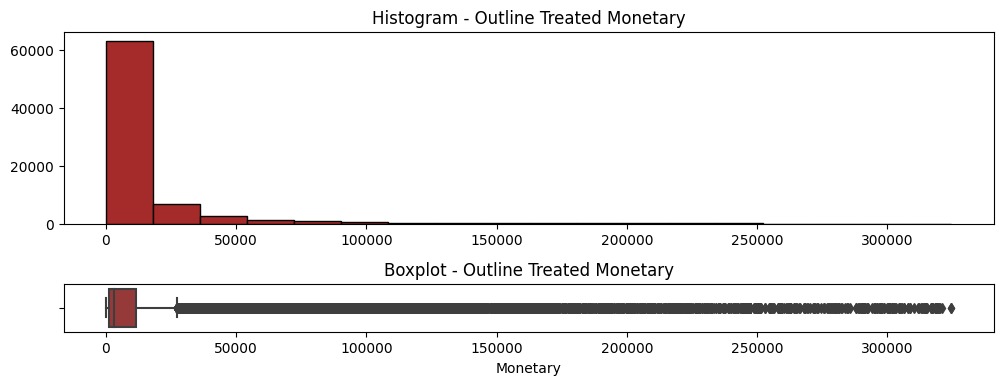

In [25]:
fig, axis_monetary = plt.subplots(nrows = 2, ncols = 1, figsize = (12, 4), dpi = 100,sharex = False, sharey = False,gridspec_kw = {'height_ratios': [4, 1]})
# Ajusts the spaces between sub Plots
plt.subplots_adjust(bottom=0.05, top=0.8 , wspace=0.5, hspace=0.5)

# Outline Treated Monetary Visualizations
axis_monetary[0].hist(processed_sales_df['Monetary'], facecolor = 'brown', edgecolor = 'black', bins = 'sturges')
sns.boxplot(data = processed_sales_df,  color = 'brown', ax = axis_monetary[1], x = 'Monetary').set(title='Boxplot - Outline Treated Monetary')
axis_monetary[0].set_title("Histogram - Outline Treated Monetary")

plt.show()